<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/DL_Module_2_Classifying_Handwritten_digits_using_Tensorflow_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Handwritten digits using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

##Installing TensorFlow 2.x

In [ ]:
#!pip install TensorFlow-GPU == 2.0.0

In [2]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.4.0


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

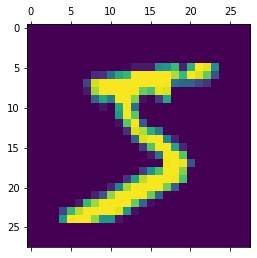

In [6]:
import matplotlib.pyplot as plt

plt.matshow(X_train[0])

In [7]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 




60000 train samples
10000 test samples


In [8]:
Y_train[0]

5

In [9]:
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [10]:
X_train[0].shape

(784,)

In [11]:
len(X_train[0])

784

In [12]:
Y_train[1]
#len(Y_train[0])
Y_train[8].shape

(10,)

In [13]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Designing the Model

###Preparing the Model 0: Single layer Perceptron

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [16]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.4956 - accuracy: 0.6104 - val_loss: 0.6524 - val_accuracy: 0.8602
Epoch 2/70
750/750 [==============================] - 1s 2ms/step - loss: 0.6418 - accuracy: 0.8523 - val_loss: 0.5056 - val_accuracy: 0.8785
Epoch 3/70
750/750 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.8704 - val_loss: 0.4486 - val_accuracy: 0.8867
Epoch 4/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4745 - accuracy: 0.8784 - val_loss: 0.4168 - val_accuracy: 0.8926
Epoch 5/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4382 - accuracy: 0.8861 - val_loss: 0.3967 - val_accuracy: 0.8951
Epoch 6/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8880 - val_loss: 0.3818 - val_accuracy: 0.8997
Epoch 7/70
750/750 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8933 - val_loss: 0.3700 - val_accuracy: 0.9014
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


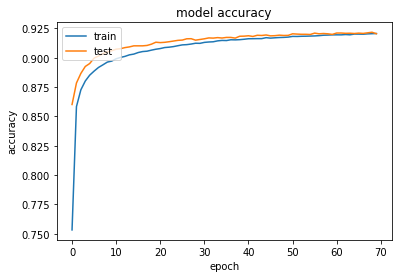

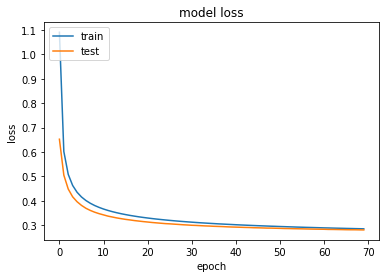

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 998us/step - loss: 0.2826 - accuracy: 0.9211
Test accuracy: 0.9211000204086304


In [22]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_0.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential_8'}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
#model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [24]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.4453 - accuracy: 0.5990 - val_loss: 0.5090 - val_accuracy: 0.8742
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4991 - accuracy: 0.8718 - val_loss: 0.3842 - val_accuracy: 0.8982
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4049 - accuracy: 0.8899 - val_loss: 0.3394 - val_accuracy: 0.9082
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3562 - accuracy: 0.9009 - val_loss: 0.3135 - val_accuracy: 0.9133
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3207 - accuracy: 0.9118 - val_loss: 0.2954 - val_accuracy: 0.9174
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3154 - accuracy: 0.9113 - val_loss: 0.2809 - val_accuracy: 0.9207
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2965 - accuracy: 0.9160 - val_loss: 0.2701 - val_accuracy: 0.9236

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


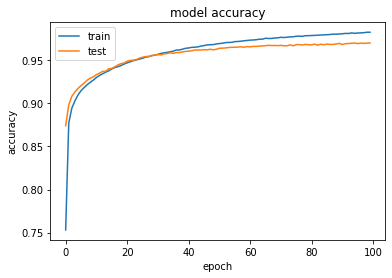

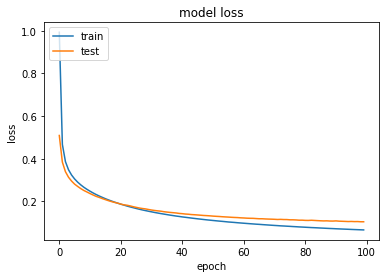

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9701
Test accuracy: 0.9700999855995178


In [28]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 64)                50240     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_1.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.01904725,  0.07194532,  0.06299079, ...,  0.035997  ,
          0.04665483, -0.0130634 ],
        [ 0.01155344,  0.0660383 , -0.05517297, ..., -0.0279857 ,
         -0.01925244, -0.08046918],
        [-0.01960188, -0.00140365, -0.05206581, ..., -0.00844514,
          0.03066137,  0.00409966],
        ...,
        [ 0.05827183,  0.03816845, -0.00919646, ...,  0.05954417,
         -0.05020625, -0.00799128],
        [ 0.02419444,  0.06714969,  0.05911805, ..., -0.02640077,
         -0.02334801, -0.07278195],
        [ 0.00799343,  0.06856898, -0.02192139, ...,  0.00045127,
          0.0828298 ,  0.01705652]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.05790989,  0.06631468,  0.03682273,  0.04545351,  0.01399155,
        -0.01858698,  0.02689691, -0.06085226, -0.16407168, -0.00839001,
        -0.03198629,  0.16999754, -0.03916056,  0.07304989,  0.

In [30]:
model_1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer_1',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'k

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
#model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))

# Adding another dense layer:
#model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
#model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [32]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1884 - accuracy: 0.9450 - val_loss: 0.1335 - val_accuracy: 0.9621
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1854 - accuracy: 0.9456 - val_loss: 0.1328 - val_accuracy: 0.9623
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1841 - accuracy: 0.9459 - val_loss: 0.1321 - val_accuracy: 0.9622
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1828 - accuracy: 0.9464 - val_loss: 0.1312 - val_accuracy: 0.9625
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1827 - accuracy: 0.9460 - val_loss: 0.1304 - val_accuracy: 0.9628
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1799 - accuracy: 0.9470 - val_loss: 0.1292 - val_accuracy: 0.9627
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1784 - accuracy: 0.9469 - val_loss: 0.1290 - val_accuracy: 0.9632

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


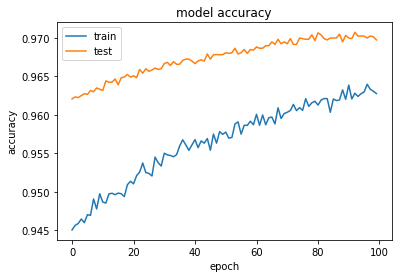

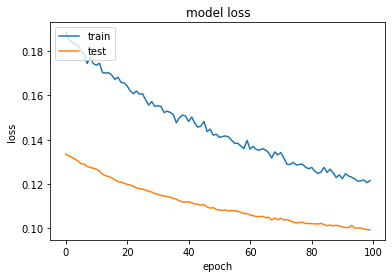

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9718
Test accuracy: 0.9718000292778015


In [ ]:
model_2.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa937b9390>>

In [ ]:
model_2.weights

[<tf.Variable 'dense_layer_12/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.01444346,  0.04693794,  0.06630043, ..., -0.02828327,
          0.0066622 , -0.06228573],
        [ 0.00188328, -0.02025648,  0.05147363, ..., -0.03649226,
         -0.0791774 , -0.05140872],
        [-0.01105335,  0.07909935,  0.02207538, ...,  0.03383812,
          0.072002  ,  0.04676753],
        ...,
        [ 0.01433832,  0.02699536, -0.05973002, ..., -0.04994123,
         -0.04667233,  0.0662267 ],
        [ 0.06559644,  0.0527534 , -0.00482842, ..., -0.00990485,
          0.03639621, -0.00409852],
        [ 0.00392337, -0.05335764,  0.02810133, ...,  0.00947598,
          0.0323821 ,  0.07919947]], dtype=float32)>,
 <tf.Variable 'dense_layer_12/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.02877636, -0.07104327,  0.05942596,  0.08215805,  0.05379437,
         0.00714801, -0.13583727, -0.004012  ,  0.00470887, -0.06922098,
         0.00214812,  0.08692232,  0.03747694, -0.03114075,

In [ ]:
model_2.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_14',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
  

###Improved Model 3: Changing the Optimizer - Adam

In [40]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [41]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 1.1240 - accuracy: 0.6296 - val_loss: 0.2271 - val_accuracy: 0.9323
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8938 - val_loss: 0.1760 - val_accuracy: 0.9489
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2812 - accuracy: 0.9188 - val_loss: 0.1530 - val_accuracy: 0.9554
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.9277 - val_loss: 0.1459 - val_accuracy: 0.9575
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2108 - accuracy: 0.9379 - val_loss: 0.1312 - val_accuracy: 0.9617
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2048 - accuracy: 0.9391 - val_loss: 0.1223 - val_accuracy: 0.9647
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1905 - accuracy: 0.9440 - val_loss: 0.1183 - val_accuracy: 0.9664
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


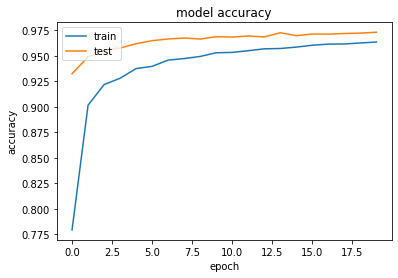

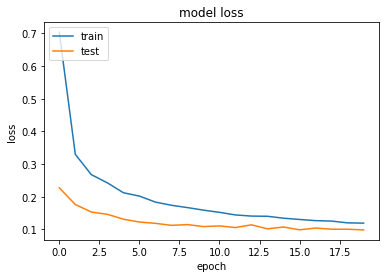

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9710
Test accuracy: 0.9710000157356262


In [ ]:
model_3.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a49a630>>

In [ ]:
model_3.weights

[<tf.Variable 'dense_layer_13/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.0470706 , -0.0605566 ,  0.05311502, ..., -0.01239798,
         -0.0326965 , -0.02283692],
        [ 0.07164595,  0.02803487, -0.02333463, ...,  0.01268711,
         -0.03852979,  0.02235638],
        [ 0.05867215, -0.01342206,  0.06247915, ...,  0.01603825,
         -0.03628643,  0.08254684],
        ...,
        [-0.01443823,  0.02990945, -0.03689074, ..., -0.03065324,
         -0.08300345, -0.03869148],
        [ 0.06107562,  0.07450309,  0.07854266, ..., -0.07303339,
         -0.01769431,  0.02703007],
        [ 0.04674842,  0.00284481, -0.06997869, ...,  0.04096612,
          0.07909941, -0.07747878]], dtype=float32)>,
 <tf.Variable 'dense_layer_13/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.10088244,  0.18129638,  0.12534155,  0.20884629, -0.1675351 ,
         0.07976656,  0.12854438,  0.1139936 ,  0.114476  ,  0.03627298,
         0.07132903, -0.01702681,  0.12008646, -0.21088558, -

In [ ]:
model_3.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_16',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [71]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.5))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.5))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [72]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=35, validation_split=0.2) 


Epoch 1/35
375/375 [==============================] - 6s 16ms/step - loss: 0.6684 - accuracy: 0.7866 - val_loss: 0.1383 - val_accuracy: 0.9591
Epoch 2/35
375/375 [==============================] - 6s 16ms/step - loss: 0.1848 - accuracy: 0.9443 - val_loss: 0.1087 - val_accuracy: 0.9678
Epoch 3/35
375/375 [==============================] - 6s 16ms/step - loss: 0.1379 - accuracy: 0.9586 - val_loss: 0.0912 - val_accuracy: 0.9732
Epoch 4/35
375/375 [==============================] - 6s 15ms/step - loss: 0.1162 - accuracy: 0.9633 - val_loss: 0.0866 - val_accuracy: 0.9723
Epoch 5/35
375/375 [==============================] - 6s 16ms/step - loss: 0.1002 - accuracy: 0.9690 - val_loss: 0.0790 - val_accuracy: 0.9768
Epoch 6/35
375/375 [==============================] - 6s 16ms/step - loss: 0.0868 - accuracy: 0.9731 - val_loss: 0.0787 - val_accuracy: 0.9777
Epoch 7/35
375/375 [==============================] - 6s 16ms/step - loss: 0.0762 - accuracy: 0.9747 - val_loss: 0.0758 - val_accuracy: 0.9778

In [76]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

# Test accuracy: 0.9843999743461609

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9832
Test accuracy: 0.9832000136375427


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


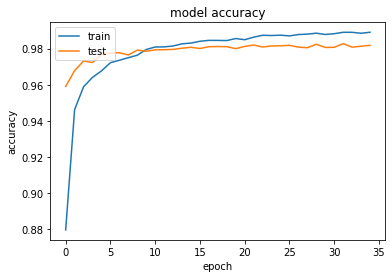

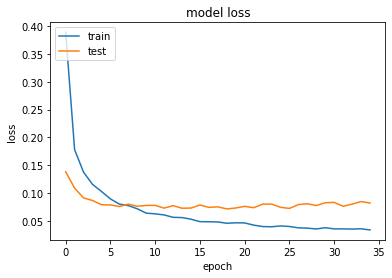

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa93c5a438>>

In [ ]:
model_4.weights

[<tf.Variable 'dense_layer_14/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.00725385, -0.02951345, -0.01022476, ...,  0.01873028,
         -0.00124576, -0.05969054],
        [-0.04041503,  0.02794901, -0.01813392, ...,  0.04797897,
         -0.05881925, -0.03724694],
        [-0.0272625 , -0.06646182,  0.01914355, ..., -0.03670435,
          0.0431502 ,  0.02895156],
        ...,
        [-0.04489559,  0.0036691 ,  0.04210217, ...,  0.04587034,
         -0.06233099,  0.03648092],
        [-0.06230009,  0.04979425, -0.0585332 , ...,  0.04988471,
          0.03459144,  0.02808205],
        [ 0.01668332,  0.05018409,  0.02200481, ...,  0.05354574,
          0.02471522, -0.03529755]], dtype=float32)>,
 <tf.Variable 'dense_layer_14/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.91322987e-02, -3.47907729e-02,  4.97164354e-02, -4.24265079e-02,
        -6.70888126e-02, -1.49358064e-02, -7.46583641e-02, -2.26146132e-02,
         2.47198083e-02, -5.43470122e-02, -1.13672033

In [ ]:
model_4.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_18',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
  

###Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/200
750/750 [==============================] - 8s 11ms/step - loss: 0.2736 - accuracy: 0.9153 - val_loss: 0.1122 - val_accuracy: 0.9662
Epoch 2/200
750/750 [==============================] - 8s 11ms/step - loss: 0.1261 - accuracy: 0.9613 - val_loss: 0.0934 - val_accuracy: 0.9716
Epoch 3/200
750/750 [==============================] - 8s 11ms/step - loss: 0.0911 - accuracy: 0.9719 - val_loss: 0.0854 - val_accuracy: 0.9732
Epoch 4/200
750/750 [==============================] - 8s 11ms/step - loss: 0.0772 - accuracy: 0.9754 - val_loss: 0.0914 - val_accuracy: 0.9728
Epoch 5/200
750/750 [==============================] - 8s 11ms/step - loss: 0.0634 - accuracy: 0.9795 - val_loss: 0.0883 - val_accuracy: 0.9760
Epoch 6/200
750/750 [==============================] - 8s 10ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0775 - val_accuracy: 0.9784
Epoch 7/200
750/750 [==============================] - 8s 10ms/step - loss: 0.0499 - accuracy: 0.9833 - val_loss: 0.0864 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


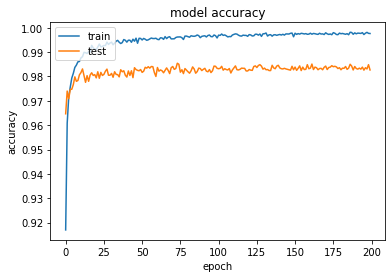

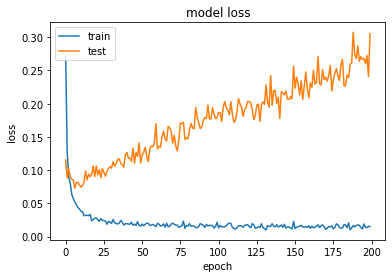

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2712 - accuracy: 0.9846
Test accuracy: 0.9846000075340271


In [ ]:
model_5.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9bc2f320>>

In [ ]:
model_5.weights

[<tf.Variable 'dense_layer_7/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.0634052 ,  0.05583071, -0.02546262, ...,  0.00274961,
          0.00298132, -0.06102526],
        [ 0.02100741,  0.0560446 , -0.06592333, ...,  0.02014928,
         -0.06059694, -0.00232304],
        [-0.0110484 , -0.05735963, -0.04017337, ...,  0.04094408,
         -0.05134601, -0.05450907],
        ...,
        [-0.05346987,  0.05107909, -0.04738276, ..., -0.01198199,
          0.01172557,  0.00727127],
        [ 0.04084275, -0.05939313, -0.03691344, ...,  0.04278713,
          0.04301028, -0.03635497],
        [-0.03174385,  0.02921092,  0.02147333, ...,  0.01470637,
          0.03640424, -0.04842476]], dtype=float32)>,
 <tf.Variable 'dense_layer_7/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.83083785e-01,  1.08741231e-01, -2.22454026e-01, -4.15814281e-01,
        -1.87059343e-01, -1.19175941e-01, -2.90526420e-01, -2.54414618e-01,
        -1.71343103e-01,  2.85642684e-01, -7.67641887e-

In [ ]:
model_5.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

###Improved Model 6: Adding Another Hidden Layer to the Model

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/200
750/750 [==============================] - 11s 15ms/step - loss: 0.2993 - accuracy: 0.9073 - val_loss: 0.1269 - val_accuracy: 0.9621
Epoch 2/200
750/750 [==============================] - 11s 15ms/step - loss: 0.1409 - accuracy: 0.9575 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 3/200
750/750 [==============================] - 11s 15ms/step - loss: 0.1100 - accuracy: 0.9669 - val_loss: 0.0996 - val_accuracy: 0.9705
Epoch 4/200
750/750 [==============================] - 11s 15ms/step - loss: 0.0940 - accuracy: 0.9718 - val_loss: 0.0896 - val_accuracy: 0.9753
Epoch 5/200
750/750 [==============================] - 11s 15ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.0962 - val_accuracy: 0.9727
Epoch 6/200
750/750 [==============================] - 11s 15ms/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0877 - val_accuracy: 0.9761
Epoch 7/200
750/750 [==============================] - 11s 15ms/step - loss: 0.0681 - accuracy: 0.9795 - val_loss: 0.0927 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


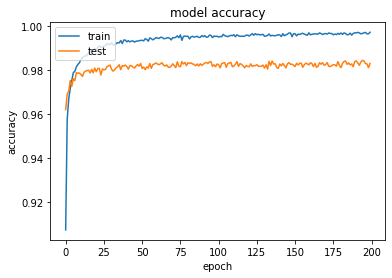

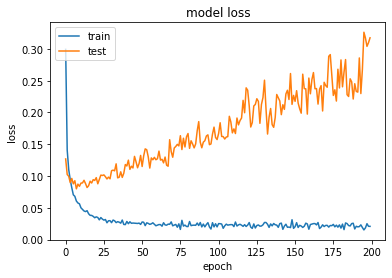

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.9834
Test accuracy: 0.9833999872207642


In [ ]:
model_6.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a1c0b00>>

In [ ]:
model_6.weights

[<tf.Variable 'dense_layer_8/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02043436, -0.03052251, -0.04867187, ..., -0.00341104,
          0.0646666 ,  0.06193061],
        [ 0.00580537, -0.03989251,  0.02505963, ...,  0.00726219,
         -0.03476311, -0.04609244],
        [ 0.02528511, -0.0624702 ,  0.02157883, ...,  0.02244397,
         -0.00719848,  0.04892342],
        ...,
        [ 0.03892381,  0.06000207,  0.02830688, ..., -0.03362466,
         -0.06500859, -0.02711738],
        [-0.062404  ,  0.04495282,  0.00313219, ...,  0.05914421,
         -0.0092866 , -0.01132109],
        [-0.04838803, -0.00661732,  0.05316094, ...,  0.05458824,
         -0.0405038 ,  0.02893919]], dtype=float32)>,
 <tf.Variable 'dense_layer_8/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.2696233 , -0.21055523, -0.33684137, -0.42744735,  0.18318221,
        -0.27374473, -0.4295545 , -0.4989392 , -0.40381438, -0.0173907 ,
        -0.02753447, -0.14542247, -0.69777596, -0.59039474, -

In [ ]:
model_6.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each hidden layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more hidden layer to the network?
- What is the accuracy score if we use RMSprop for model 6?
- Does manipulating the learning rate affect the model? Justify your answer.
- What is the best parameter configuration for this project?


###**`.ipynb file 2`** 


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.<br>
<br>
**Dataset Description**
- Total Images: 70,000 
- Train Images: 60,000 
- Test Images: 10,000 
- Image Size: 28 X 28 
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 

>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using muli-layer perceptron for classifing the images from [MNIST Fashion Dataset ](https://github.com/zalandoresearch/fashion-mnist) with best accuracy
- Prepare the dataset for the model
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy

**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?
 